In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage


# df = pd.read_csv('final.csv')
# x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
# y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# data = list(zip(x, y))

# hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# labels = hierarchical_cluster.fit_predict(data)

# plt.scatter(x, y, c=labels)
# plt.show()

In [5]:
df = pd.read_csv('final.csv')
df.head()

,Unnamed: 0,CustomerID,no_bills,sum_bill,no_item,Recency,Recency_min,no_item_per_bill,Average_bill,summ_bill_log,Average_bill_log,Recency_int,month_interval,no_of_visit_per_month,Country
0,0,12346.0,1,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,1.00,77183.600000,11.253942,11.253942,1.0,0.000000,0.000000,United Kingdom
1,1,12347.0,7,4310.00,182,2011-12-07 15:52:00,2010-12-07 14:57:00,26.00,615.714286,8.368693,6.422783,12.0,12.166667,1.738095,Iceland
2,2,12348.0,4,1437.24,27,2011-09-25 13:13:00,2010-12-16 19:09:00,6.75,359.310000,7.270480,5.884186,9.0,9.400000,2.350000,Finland
3,3,12349.0,1,1457.55,72,2011-11-21 09:51:00,2011-11-21 09:51:00,72.00,1457.550000,7.284512,7.284512,11.0,0.000000,0.000000,Italy
4,4,12350.0,1,294.40,16,2011-02-02 16:01:00,2011-02-02 16:01:00,16.00,294.400000,5.684939,5.684939,2.0,0.000000,0.000000,Norway


In [41]:
df = df[df.Country == 'United Kingdom']

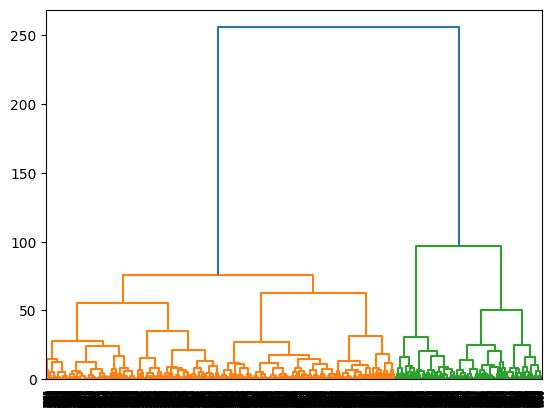

In [42]:
data= df[['summ_bill_log','Average_bill_log','Recency_int','no_of_visit_per_month']]
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [46]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)


In [47]:
len(df),len(labels)

(3840, 3840)

In [48]:
df['label']=labels

/home/u185935/tmp/ipykernel_3520638/698969719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=labels


In [49]:
df['label'].value_counts()

4    898
5    708
0    672
1    644
2    463
3    455
Name: label, dtype: int64

In [51]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

In [50]:
df.Country.value_counts()

United Kingdom    3840
Name: Country, dtype: int64

In [71]:
df['below_2'] = np.where(df.no_bills<=2,1,0)
df['below_5'] = np.where(((df.no_bills>2) & (df.no_bills<=5)),1,0)
df['More_5'] = np.where(df.no_bills>5,1,0)



/home/u185935/tmp/ipykernel_3520638/3633046490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['below_2'] = np.where(df.no_bills<=2,1,0)
/home/u185935/tmp/ipykernel_3520638/3633046490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['below_5'] = np.where(((df.no_bills>2) & (df.no_bills<=5)),1,0)
/home/u185935/tmp/ipykernel_3520638/3633046490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [72]:
df

,Unnamed: 0,CustomerID,no_bills,sum_bill,no_item,Recency,Recency_min,no_item_per_bill,Average_bill,summ_bill_log,Average_bill_log,Recency_int,month_interval,no_of_visit_per_month,Country,label,below_2,below_5,More_5
0,0,12346.0,1,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,1.000000,77183.600000,11.253942,11.253942,1.0,0.000000,0.000000,United Kingdom,0,1,0,0
328,328,12747.0,11,4196.01,103,2011-12-07 14:34:00,2010-12-05 15:38:00,9.363636,381.455455,8.341889,5.943994,12.0,12.200000,1.109091,United Kingdom,4,0,0,1
329,329,12749.0,5,4040.88,198,2011-12-06 09:56:00,2011-05-10 15:25:00,39.600000,808.176000,8.304218,6.694780,12.0,6.966667,1.393333,United Kingdom,4,0,1,0
374,374,12820.0,4,942.34,59,2011-12-06 15:12:00,2011-01-17 12:34:00,14.750000,235.585000,6.848366,5.462072,12.0,10.766667,2.691667,United Kingdom,3,0,1,0
375,375,12821.0,1,92.72,6,2011-05-09 15:51:00,2011-05-09 15:51:00,6.000000,92.720000,4.529584,4.529584,5.0,0.000000,0.000000,United Kingdom,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,4253,18280.0,1,180.60,10,2011-03-07 09:52:00,2011-03-07 09:52:00,10.000000,180.600000,5.196285,5.196285,3.0,0.000000,0.000000,United Kingdom,0,1,0,0
4254,4254,18281.0,1,80.82,7,2011-06-12 10:53:00,2011-06-12 10:53:00,7.000000,80.820000,4.392224,4.392224,6.0,0.000000,0.000000,United Kingdom,2,1,0,0
4255,4255,18282.0,2,178.05,12,2011-12-02 11:43:00,2011-08-05 13:35:00,6.000000,89.025000,5.182064,4.488917,12.0,3.933333,1.966667,United Kingdom,5,1,0,0
4256,4256,18283.0,16,2088.93,754,2011-12-06 12:02:00,2011-01-06 14:14:00,47.125000,130.558125,7.644407,4.871819,12.0,11.100000,0.693750,United Kingdom,4,0,0,1


In [73]:
df_s = df.groupby(['label']).agg(size = ('label','count'),total_bill = ('sum_bill',np.sum),
                          total_trip = ('no_bills',sum),
                       avg_recency = ('Recency_int',np.mean),avg_month =('month_interval',np.mean),
                                less_than2 = ('below_2',np.sum),
                                  more_than2 = ('below_5',np.sum),
                                  more_than5 = ('More_5',np.sum),
                                 tota
                                )
                                 
                       
                               

In [74]:
df_s['avg_bill'] = df_s.total_bill/df_s.total_trip

In [76]:
df_s['total'] = df_s.less_than2 + df_s.more_than2 + df_s.more_than5

In [77]:
df_s

,size,total_bill,total_trip,avg_recency,avg_month,less_than2,more_than2,more_than5,avg_bill,total
label,,,,,,,,,,
0,672,440078.18,912,2.668155,0.402083,625,41,6,482.541864,672
1,644,841583.61,2257,9.330745,4.839959,271,261,112,372.877098,644
2,463,327934.25,1131,6.665227,3.046076,290,149,24,289.950707,463
3,455,431252.53,1387,10.898901,9.044982,188,254,13,310.924679,455
4,898,3007740.73,6805,11.397550,7.543912,106,239,553,441.989821,898
5,708,225856.18,1091,10.491525,0.719021,617,86,5,207.017580,708


In [80]:
df_s['less_than2'] = df_s['less_than2']/df_s['total']
df_s['more_than2'] = df_s['more_than2']/df_s['total']
df_s['more_than5'] = df_s['more_than5']/df_s['total']


In [84]:
df_s

,size,total_bill,total_trip,avg_recency,avg_month,less_than2,more_than2,more_than5,avg_bill,total
label,,,,,,,,,,
0,672,440078.18,912,2.668155,0.402083,0.930060,0.061012,0.008929,482.541864,672
1,644,841583.61,2257,9.330745,4.839959,0.420807,0.405280,0.173913,372.877098,644
2,463,327934.25,1131,6.665227,3.046076,0.626350,0.321814,0.051836,289.950707,463
3,455,431252.53,1387,10.898901,9.044982,0.413187,0.558242,0.028571,310.924679,455
4,898,3007740.73,6805,11.397550,7.543912,0.118040,0.266147,0.615813,441.989821,898
5,708,225856.18,1091,10.491525,0.719021,0.871469,0.121469,0.007062,207.017580,708


In [86]:
df_s[['less_than2', 'more_than2', 'more_than5']]*100

,less_than2,more_than2,more_than5
label,,,
0,93.005952,6.101190,0.892857
1,42.080745,40.527950,17.391304
2,62.634989,32.181425,5.183585
3,41.318681,55.824176,2.857143
4,11.804009,26.614699,61.581292
5,87.146893,12.146893,0.706215


In [ ]:
df_s.to_csv